In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

In [7]:
classes = ["airplane", "automobile", "bird","cat", "deer","dog","frog","horse","ship","truck"]

In [8]:
classes[y_train[12][0]]

'horse'

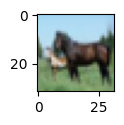

In [9]:
plot_sample(12)

In [10]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 161s 102ms/step - loss: 1.9137 - accuracy: 0.3231
Epoch 2/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.6772 - accuracy: 0.3960
Epoch 3/5
1304/1563 [========================>.....] - ETA: 26s - loss: 1.5918 - accuracy: 0.4280

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 3s 8ms/step


In [ ]:
y_pred_class[:5]

[5, 9, 8, 8, 4]

In [ ]:
classes[y_pred_class[0]]

'dog'

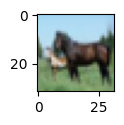

In [ ]:
plot_sample(12)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define the input shape
i = Input(shape=X_train[0].shape)

# Create the convolutional layers
x = Conv2D(32, (3,3), strides=2, activation='relu') (i)
x = Conv2D(64, (3,3), strides=2,activation='relu') (x)
x = Conv2D(128, (3,3), strides=2,activation='relu') (x)

# Flatten the output
x = Flatten() (x)

# Create the fully connected layers
x = Dense(1024 ,activation = 'relu') (x)
x = Dense(10,activation = 'softmax') (x)

cnn = Model(i, x)

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(X_train ,y_train ,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 23s 14ms/step - loss: 1.4716 - accuracy: 0.4671
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1048 - accuracy: 0.6089
Epoch 3/5
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9040 - accuracy: 0.6803
Epoch 4/5
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7404 - accuracy: 0.7373
Epoch 5/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5730 - accuracy: 0.7977


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9956 - accuracy: 0.6774


[0.9956088662147522, 0.6773999929428101]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[6.2016642e-04, 1.8197406e-04, 1.4347130e-03, 8.5280907e-01,
        5.8964599e-04, 1.0417242e-01, 6.4823031e-03, 6.4162287e-04,
        3.2891076e-02, 1.7700753e-04],
       [2.2937976e-04, 1.6466832e-01, 2.4598222e-08, 4.1774348e-07,
        9.4512764e-10, 3.0630272e-08, 6.4890308e-08, 1.9325060e-07,
        8.3288372e-01, 2.2178385e-03],
       [8.0244809e-02, 1.9541726e-02, 5.2204379e-04, 2.3236635e-04,
        5.1177054e-04, 4.5389010e-04, 6.8261811e-06, 9.5593638e-04,
        8.5964328e-01, 3.7887357e-02],
       [9.3785244e-01, 3.1302616e-02, 3.3484290e-03, 4.2700308e-04,
        1.1691062e-03, 4.6498488e-05, 2.2770173e-05, 1.0933937e-02,
        1.4590850e-02, 3.0635344e-04],
       [4.3539146e-09, 6.0121330e-09, 2.1417728e-03, 1.9304305e-01,
        5.3856051e-01, 2.0858413e-03, 2.6416573e-01, 2.7839965e-06,
        3.0823011e-07, 1.2690211e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_train = y_train.flatten()

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes[y_classes[3]]

'airplane'